In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew


In [2]:
with open('data/text_natural/text_natural_1.txt') as f:
    text = f.read()

In [3]:
char_freq = Counter(text)
char_freq.most_common(5)

[(' ', 479), ('e', 316), ('t', 174), ('r', 171), ('a', 167)]

In [4]:
char_entropy = 0

for freq in char_freq.values():
    prob = freq / len(text)
    char_entropy -= prob * np.log2(prob)

max_char_entropy = np.log2(len(char_freq))

print(f'Entropy: {char_entropy:.4f} bits per character')
print(f'Max Entropy: {max_char_entropy:.4f} bits per character')
print(f'{char_entropy / max_char_entropy * 100:.2f}% of maximum entropy')

Entropy: 4.3543 bits per character
Max Entropy: 5.5236 bits per character
78.83% of maximum entropy


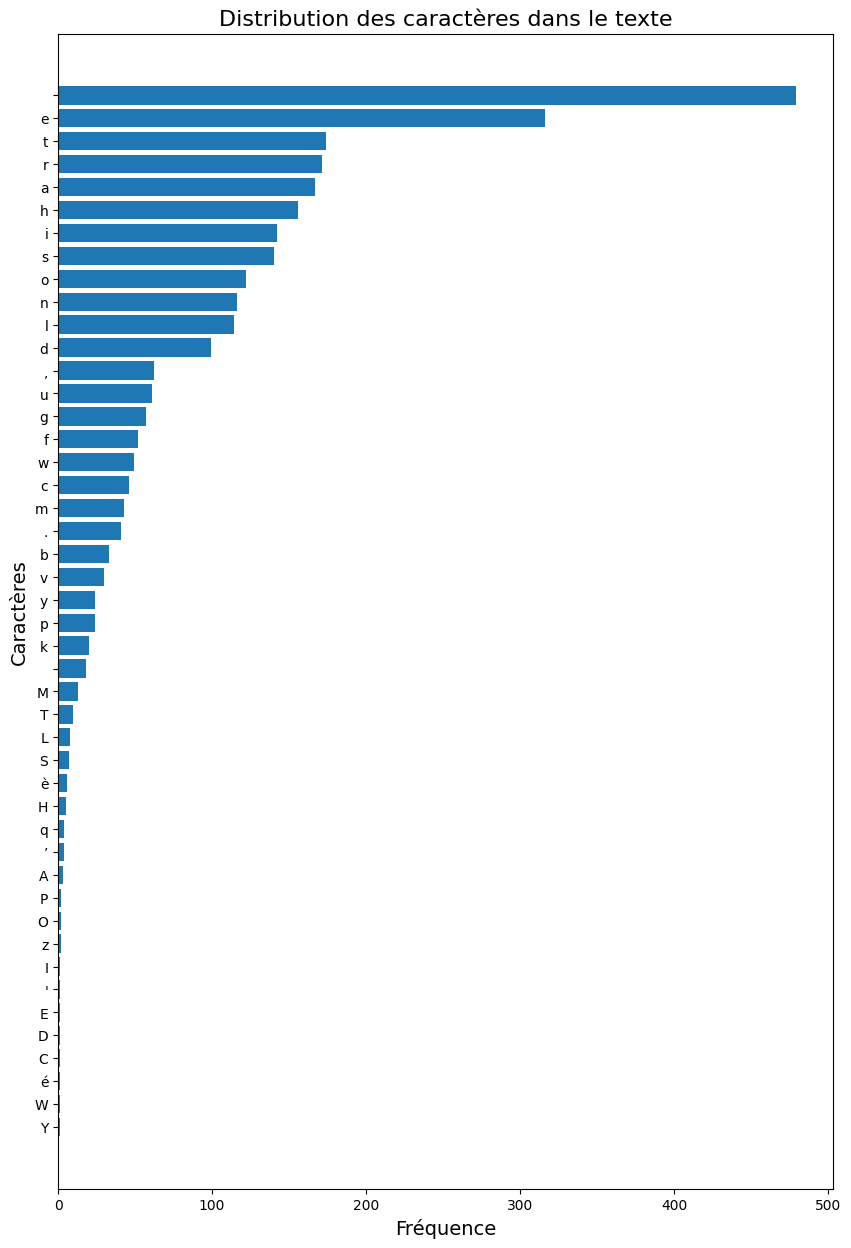

In [5]:
chars, freqs = zip(*char_freq.most_common())
plt.figure(figsize=(10, 15))
plt.barh(chars[::-1], freqs[::-1])
plt.title("Distribution des caractères dans le texte", fontsize=16)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Caractères", fontsize=14)

plt.show()


In [6]:
char_distribution_skewness = skew(freqs)
char_distribution_skewness


np.float64(2.605687681361167)

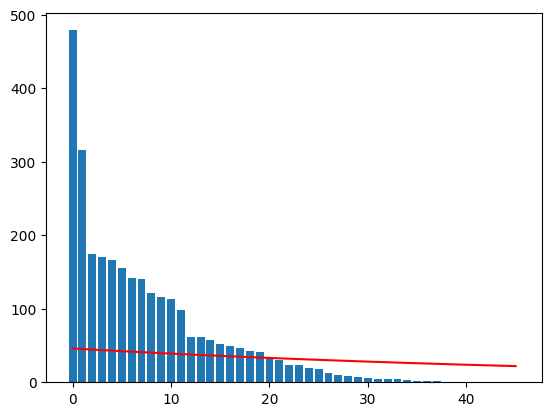

In [7]:
p = 1 / np.mean(freqs)
x = np.linspace(0, len(chars) - 1, len(chars))
y = len(text) * p * (1 - p) ** x
plt.bar(range(len(chars)), freqs)
plt.plot(x, y, color='red')
plt.show()

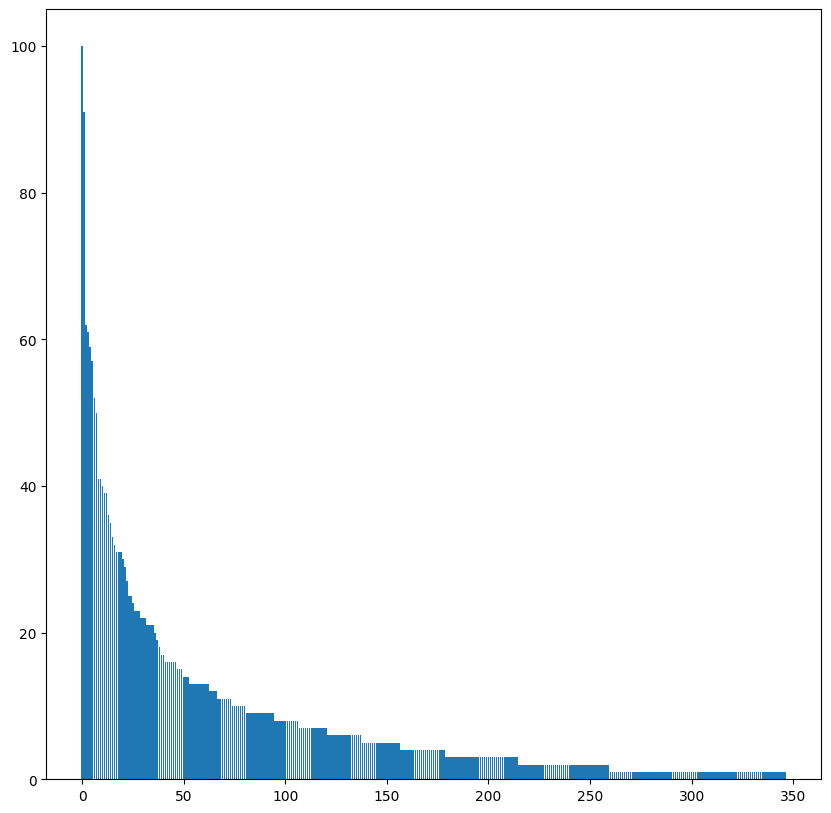

In [8]:

byte_pairs = [text[i-1] + text[i] for i in range(1, len(text))]
byte_pair_freq = Counter(byte_pairs)
plt.figure(figsize=(10, 10))
plt.bar(range(len(byte_pair_freq)), [freq for _, freq in byte_pair_freq.most_common()])
plt.show()

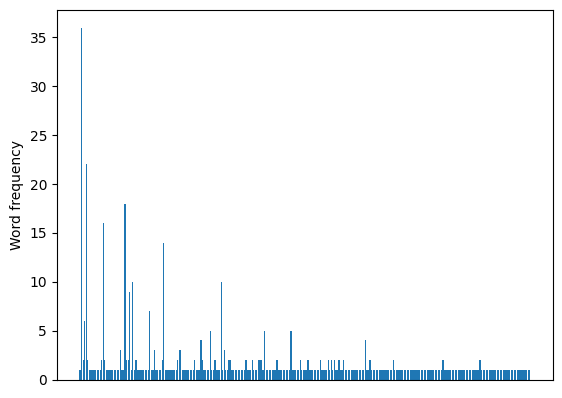

1.6804123711340206
1.0


In [9]:
words = text.split()
word_freq = list(Counter(words).values())
plt.bar(range(len(word_freq)), word_freq)
plt.xticks([])
plt.ylabel('Word frequency')
plt.show()
print(np.mean(word_freq))
print(np.median(word_freq))
# TODO les tops 10 plus longues chaines occupent ? % de la taille du text 

In [10]:
words = text.split()
word_counts = Counter(words)
total_words = sum(word_counts.values())

top10_words = word_counts.most_common(10)
print("Top 10 mots les plus fréquents:")
for word, count in top10_words:
    print(f"{word}: {count} ({count / total_words * 100:.2f}%)")

Top 10 mots les plus fréquents:
the: 36 (7.36%)
of: 22 (4.50%)
her: 18 (3.68%)
a: 16 (3.27%)
and: 14 (2.86%)
The: 10 (2.04%)
Marie: 10 (2.04%)
with: 9 (1.84%)
She: 7 (1.43%)
village: 6 (1.23%)


In [13]:
import math


entropy = 0
for count in word_counts.values():
    p = count / total_words
    entropy -= p * math.log2(p)

print(f"Shannon entropy (based on words): {entropy:.4f} bits")


unique_words = len(word_counts)
# Maximum entropy (uniform distribution)
if unique_words > 0:
    max_entropy = math.log2(unique_words)
    entropy_ratio = entropy / max_entropy
else:
    max_entropy = 0
    entropy_ratio = 0
print(f"Max entropy (uniform): {max_entropy:.4f} bits")
print(f"Entropy ratio: {entropy_ratio:.4f}")

Shannon entropy (based on words): 7.4095 bits
Max entropy (uniform): 8.1849 bits
Entropy ratio: 0.9053
